In [1]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

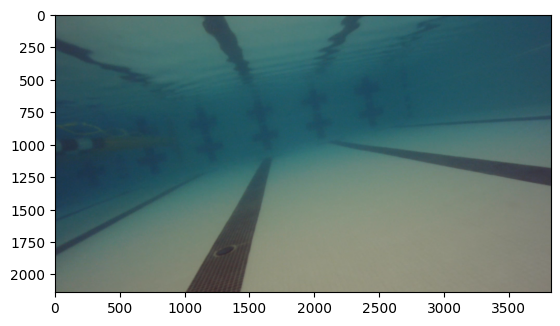

In [15]:
img = cv2.imread("bwsi_pool.png")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

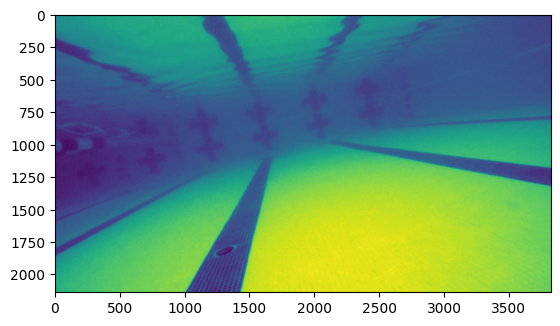

In [16]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

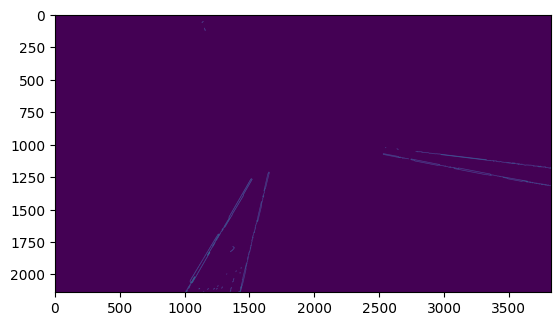

In [39]:
edges = cv2.Canny(gray, 400, 700, apertureSize=5)  # Detect edges
lines = cv2.HoughLinesP(
                edges,
                1,
                np.pi/180,
                100,
                minLineLength=300,
                maxLineGap=20,
        ) # detect lines

for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(gray, (x1, y1), (x2, y2), (0, 255, 0), 2)
    cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
    #cv2.putText(img, f"({x1}, {y1})", (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
    #cv2.putText(img, f"({x2}, {y2})", (x2, y2), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

plt.imshow(edges)

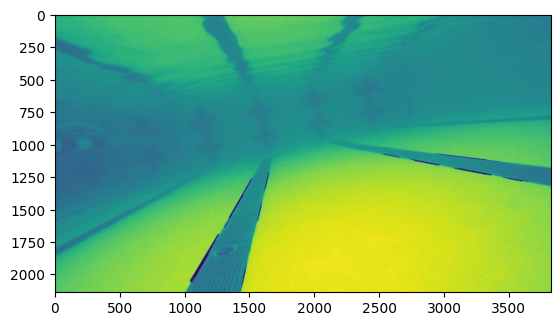

In [40]:
plt.imshow(gray)

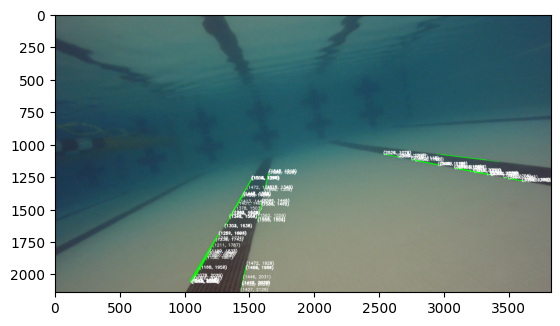

In [41]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [7]:
# Delta y / delta x
# x1, y1, x2, y2
slopes = (lines[:, :, 3] - lines[:, :, 1]) / (lines[:, :, 1] - lines[:, :, 0])
# y = mx + b
# b = y - mx
# x-intercept: y = 0
# x = (y - b) / m
b = lines[:, :, 1] - slopes * lines[:, :, 0]
intercepts = (np.zeros_like(slopes) - b) / slopes
zipped = zip(lines, slopes, intercepts)
sort = sorted(zipped, key=lambda pair: pair[2])
def chunk(l, n):
    return [l[i:i + n] for i in range(0, len(l), n)]

In [8]:
import pprint
pprint.pprint(chunk(sort, 2))

[[(array([[ 766,  536,  928, 1067]], dtype=int32),
   array([-2.30869565]),
   array([998.16572505])),
  (array([[ 865,  570, 1158, 1077]], dtype=int32),
   array([-1.71864407]),
   array([1196.65680473]))]]


In [9]:
zipped = zip(lines, slopes, intercepts)
print(list(zipped))

[(array([[ 865,  570, 1158, 1077]], dtype=int32), array([-1.71864407]), array([1196.65680473])), (array([[ 766,  536,  928, 1067]], dtype=int32), array([-2.30869565]), array([998.16572505]))]


In [10]:
def get_slopes(frame):
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 600, 1200, apertureSize=5)
    lines = cv2.HoughLinesP(edges, 1, np.pi / 180, 100, minLineLength=500, maxLineGap=30)
    
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.line(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(frame, f"({x1}, {y1})", (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
            cv2.putText(frame, f"({x2}, {y2})", (x2, y2), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        return (lines[:, :, 3] - lines[:, :, 1]) / (lines[:, :, 1] - lines[:, :, 0])
    return None

cap = cv2.VideoCapture("vid.mkv")
success = cap.grab()
new_frames = []
slopes = []
i = 0
while success:
    i += 1
    if i % 50 == 0:
        _, frame = cap.retrieve()
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        slope = get_slopes(frame)
        if slopes is not None:
            new_frames.append(frame)
            slopes.append(slope)
    success = cap.grab()

[ERROR:0@97.457] global cap.cpp:164 open VIDEOIO(CV_IMAGES): raised OpenCV exception:

OpenCV(4.8.0) /io/opencv/modules/videoio/src/cap_images.cpp:253: error: (-5:Bad argument) CAP_IMAGES: can't find starting number (in the name of file): vid.mkv in function 'icvExtractPattern'




In [11]:
print(len(new_frames))

0


In [12]:
height, width, layers = new_frames[0].shape
print(height, width, layers)

IndexError: list index out of range

In [13]:
video = cv2.VideoWriter('output.avi',cv2.VideoWriter_fourcc(*'DIVX'), 15, (width, height))
for frame in new_frames:
    video.write(frame)
video.release()

NameError: name 'width' is not defined

In [14]:
colors = np.array([(35, 35, 35), (255, 255, 255)])
def avg_color(*colors):
    """
    Find the average of color one and two.

        Parameters:
            *colors (tuple)
    """

    return np.average(colors)

print(avg_color(colors))

145.0
